## Análise referente aos dados do conjunto Iris

In [2]:
## Importações de Bibliotecas padrão, e o dataset Iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Instanciando o dataset Iris
iris = load_iris()
## Criando um DataFrame com os dados do dataset Iris
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Adicionando a coluna target(Nosso Alvo) ao DataFrame
iris_df["target"] = iris.target

## Adicionando a coluna target_name(Nome do Alvo) ao DataFrame
iris_df["target_name"] = iris_df["target"].map(dict(enumerate(iris.target_names)))  

### Agora irei analisar por cima quais informações constam no DataFrame, com funções padrão head, describe, value_count, info e etc

In [3]:
## Chamando a função head() para mostrar as 5 primeiras linhas do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
## Chamando a função info() para mostrar informações do DataFrame
## Algumas informações de destaque é que nenhuma linha possui valores nulos e que todas as colunas são do tipo float64, exceto claro nossos alvos
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Logo no item "Verifique a necessidade de limpeza dos dados", até o momento não foi necessário

In [5]:
## Chamando a função describe() para mostrar informações estatísticas do DataFrame
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### No item "Descreva as medidas de tendências central do conjunto"
### São 150 instâncias totais

In [6]:
## Criando uma função que me retorna a média, mediana e moda de todas colunas de um DataFrame
from scipy import stats

def get_stats(df):
    for column in df.columns:
        mean = df[column].mean().round(2)
        median = df[column].median().round(2)
        mode = stats.mode(df[column])
        print(f'Sobre a coluna {column} temos:\nMédia: {mean}\nMediana: {median}\nModa: {mode.mode}')

## Chamando a função get_stats() para o dataframe iris_df
get_stats(iris_df.drop(columns=["target", "target_name"]))

Sobre a coluna sepal length (cm) temos:
Média: 5.84
Mediana: 5.8
Moda: 5.0
Sobre a coluna sepal width (cm) temos:
Média: 3.06
Mediana: 3.0
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 3.76
Mediana: 4.35
Moda: 1.4
Sobre a coluna petal width (cm) temos:
Média: 1.2
Mediana: 1.3
Moda: 0.2


In [7]:
## Aplicando a função value_counts na coluna target_name podemos os tipos de flor e a quantidade de cada no dataset
iris_df.value_counts('target_name')

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Logo temos 3 espécies(classes): Setosa, Versicolor, Virginica. Cada uma com 50 observações.

In [8]:
## Vou separar o DataFrame em 3, um para cada tipo de flor
setosa = iris_df[iris_df["target_name"] == "setosa"].drop(columns=["target", "target_name"])
versicolor = iris_df[iris_df["target_name"] == "versicolor"].drop(columns=["target", "target_name"])
virginica = iris_df[iris_df["target_name"] == "virginica"].drop(columns=["target", "target_name"])

### Descrevendo as medidas de tendência central por conjunto de espécie:

In [9]:
### Reutilizando a função get_stats() para cada DataFrame
print("Setosa")
get_stats(setosa)

Setosa
Sobre a coluna sepal length (cm) temos:
Média: 5.01
Mediana: 5.0
Moda: 5.0
Sobre a coluna sepal width (cm) temos:
Média: 3.43
Mediana: 3.4
Moda: 3.4
Sobre a coluna petal length (cm) temos:
Média: 1.46
Mediana: 1.5
Moda: 1.4
Sobre a coluna petal width (cm) temos:
Média: 0.25
Mediana: 0.2
Moda: 0.2


In [10]:
print("Versicolor")
get_stats(versicolor)

Versicolor
Sobre a coluna sepal length (cm) temos:
Média: 5.94
Mediana: 5.9
Moda: 5.5
Sobre a coluna sepal width (cm) temos:
Média: 2.77
Mediana: 2.8
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 4.26
Mediana: 4.35
Moda: 4.5
Sobre a coluna petal width (cm) temos:
Média: 1.33
Mediana: 1.3
Moda: 1.3


In [11]:
print("Virginica")
get_stats(virginica)

Virginica
Sobre a coluna sepal length (cm) temos:
Média: 6.59
Mediana: 6.5
Moda: 6.3
Sobre a coluna sepal width (cm) temos:
Média: 2.97
Mediana: 3.0
Moda: 3.0
Sobre a coluna petal length (cm) temos:
Média: 5.55
Mediana: 5.55
Moda: 5.1
Sobre a coluna petal width (cm) temos:
Média: 2.03
Mediana: 2.0
Moda: 1.8


### Gráfico de distribuição das variáveis de todo conjunto

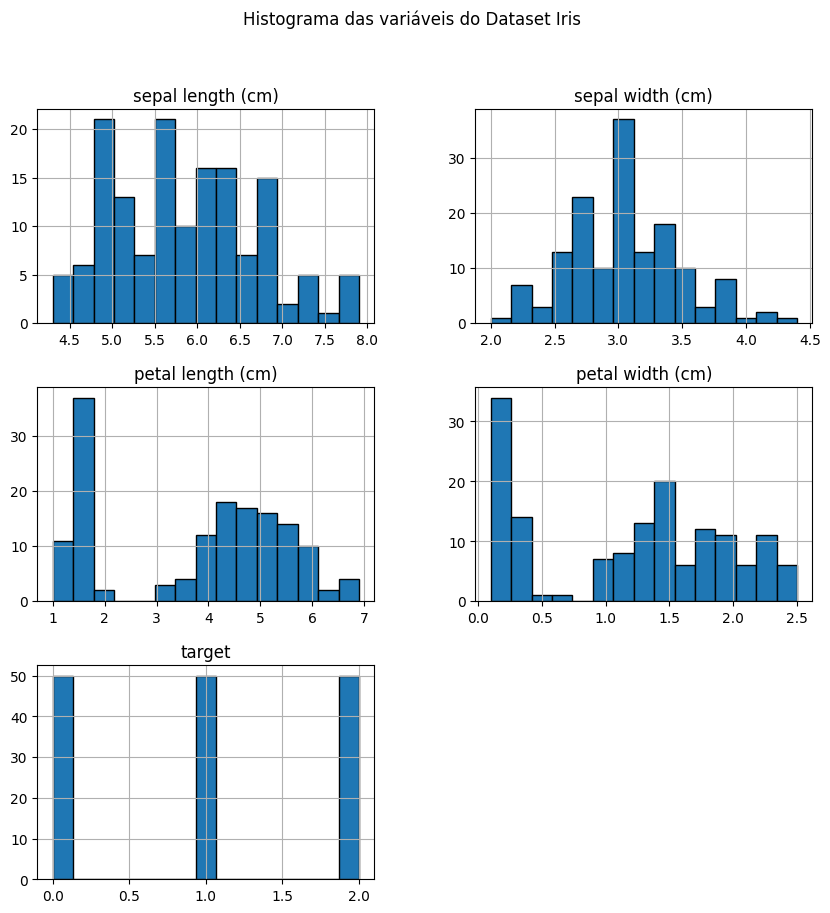

In [12]:
iris_df.hist(figsize=(10, 10), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis do Dataset Iris")
plt.show()

### Gráfico de distribuição das variáveis por espécie

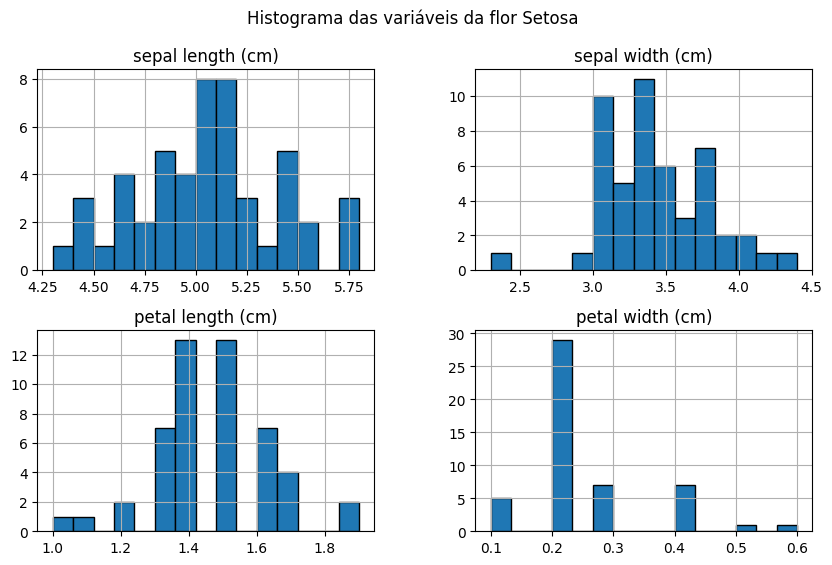

In [13]:
setosa.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Setosa")
plt.show()

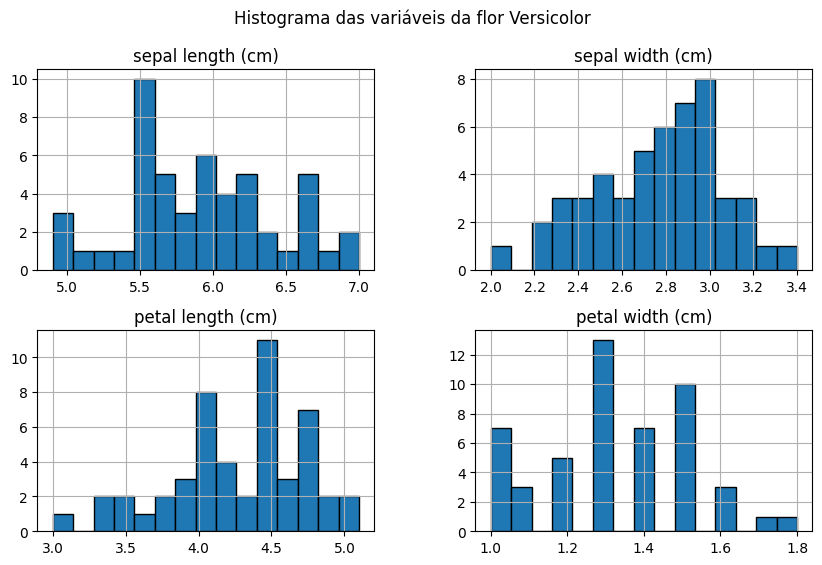

In [14]:
versicolor.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Versicolor")
plt.show()

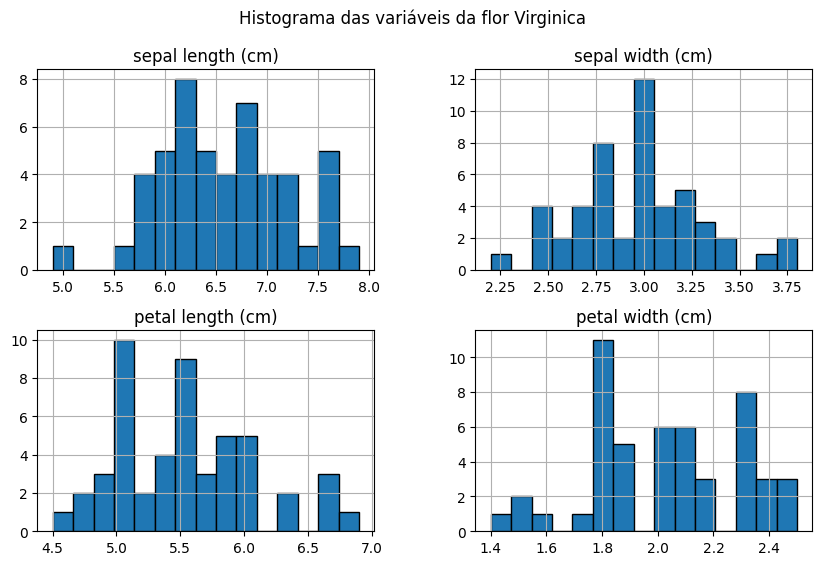

In [15]:
virginica.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograma das variáveis da flor Virginica")
plt.show()

### Gráfico de correlação

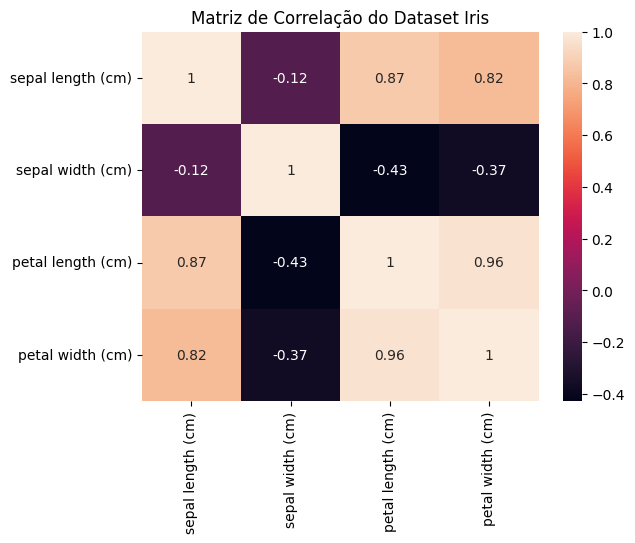

In [16]:
corr_matrix = iris_df.drop(columns=['target_name', 'target']).corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlação do Dataset Iris")
plt.show()

In [18]:
corr_matrix['sepal length (cm)'].sort_values(ascending=False)

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
sepal width (cm)    -0.117570
Name: sepal length (cm), dtype: float64

#### Com essa função a gente organiza quais variaveis se correlacionam com a coluna alvo, lembrando sempre que na correlação as colunas mais utéis são as que se aproxima de 1 e -1 e que menos se correlacionam estão proximas do 0, então mesmo que o valor seja negativo é bastante útil para o aprendizado do modelo

In [19]:
iris_df.groupby('target_name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


### Aqui podemos ver algumas caracteristicas que separam as espécies
- Iris Setosa -> Possuem Sepálas mais curtas e largas, Petálas pequenas
- Iris Versicolor -> Fica no intermediário entre as outras duas
- Iris Virginica -> Possui Sepálas longas e Petálas Longas e finas

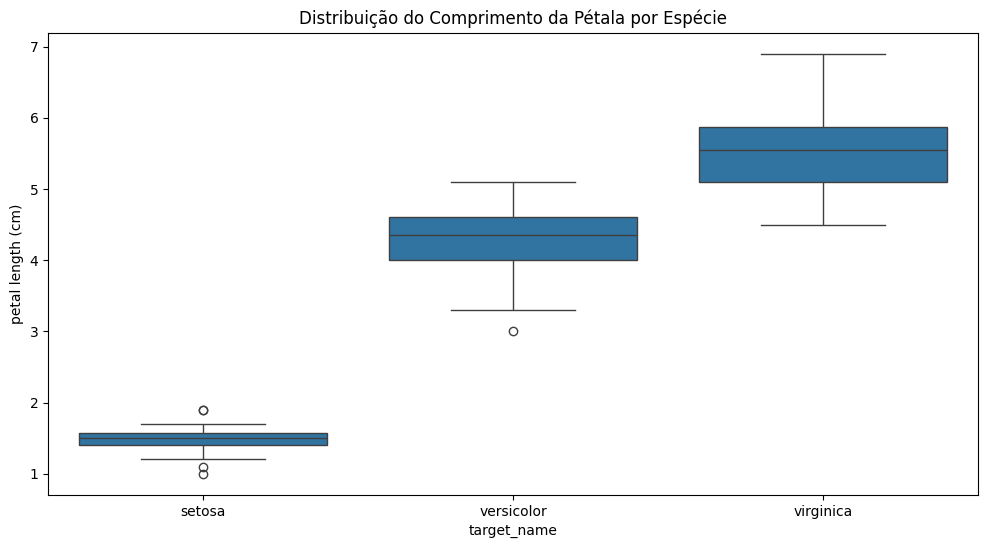

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x="target_name", y="petal length (cm)", data=iris_df)
plt.title("Distribuição do Comprimento da Pétala por Espécie")
plt.show()


### Quando uma váriavel tem grande diferença entre espécies facilita para a classificação, Como podemos ver no caso do boxplot do comprimento das pétalas. 

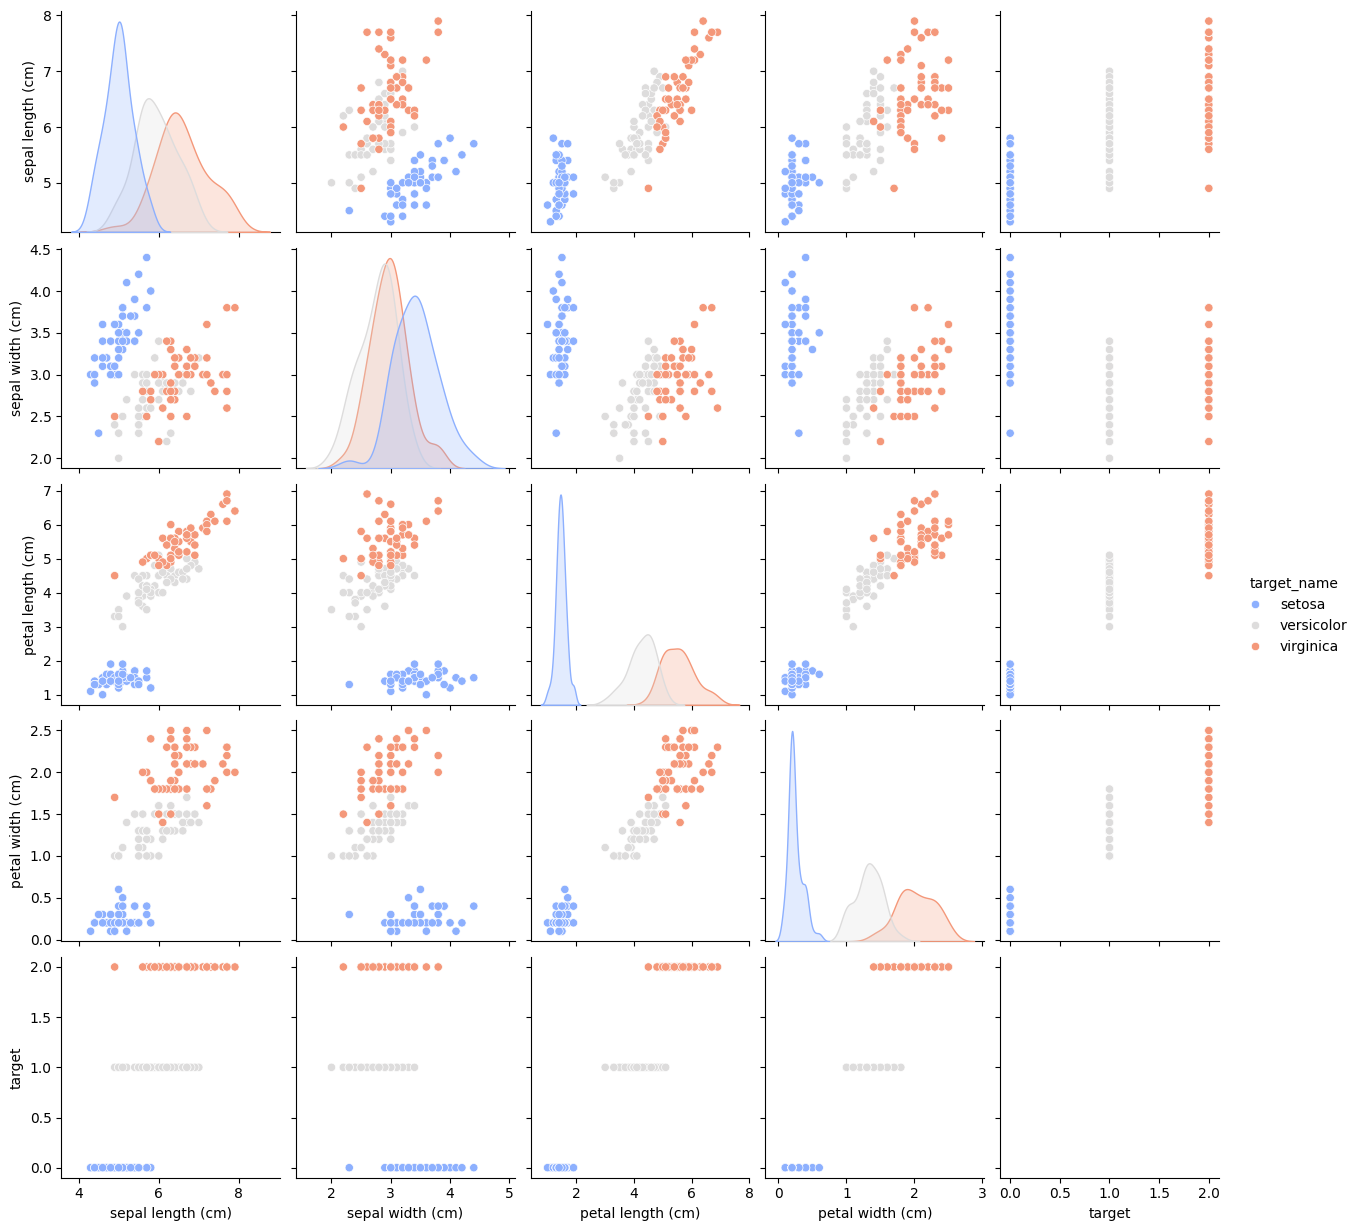

In [22]:
sns.pairplot(iris_df, hue="target_name", diag_kind="kde", palette="coolwarm")
plt.show()


### Nesse pairplot podemos ver melhor que as petálas facilitam na classificação, enquanto as sepálas(principalmente a largura) ficam mais difíceis

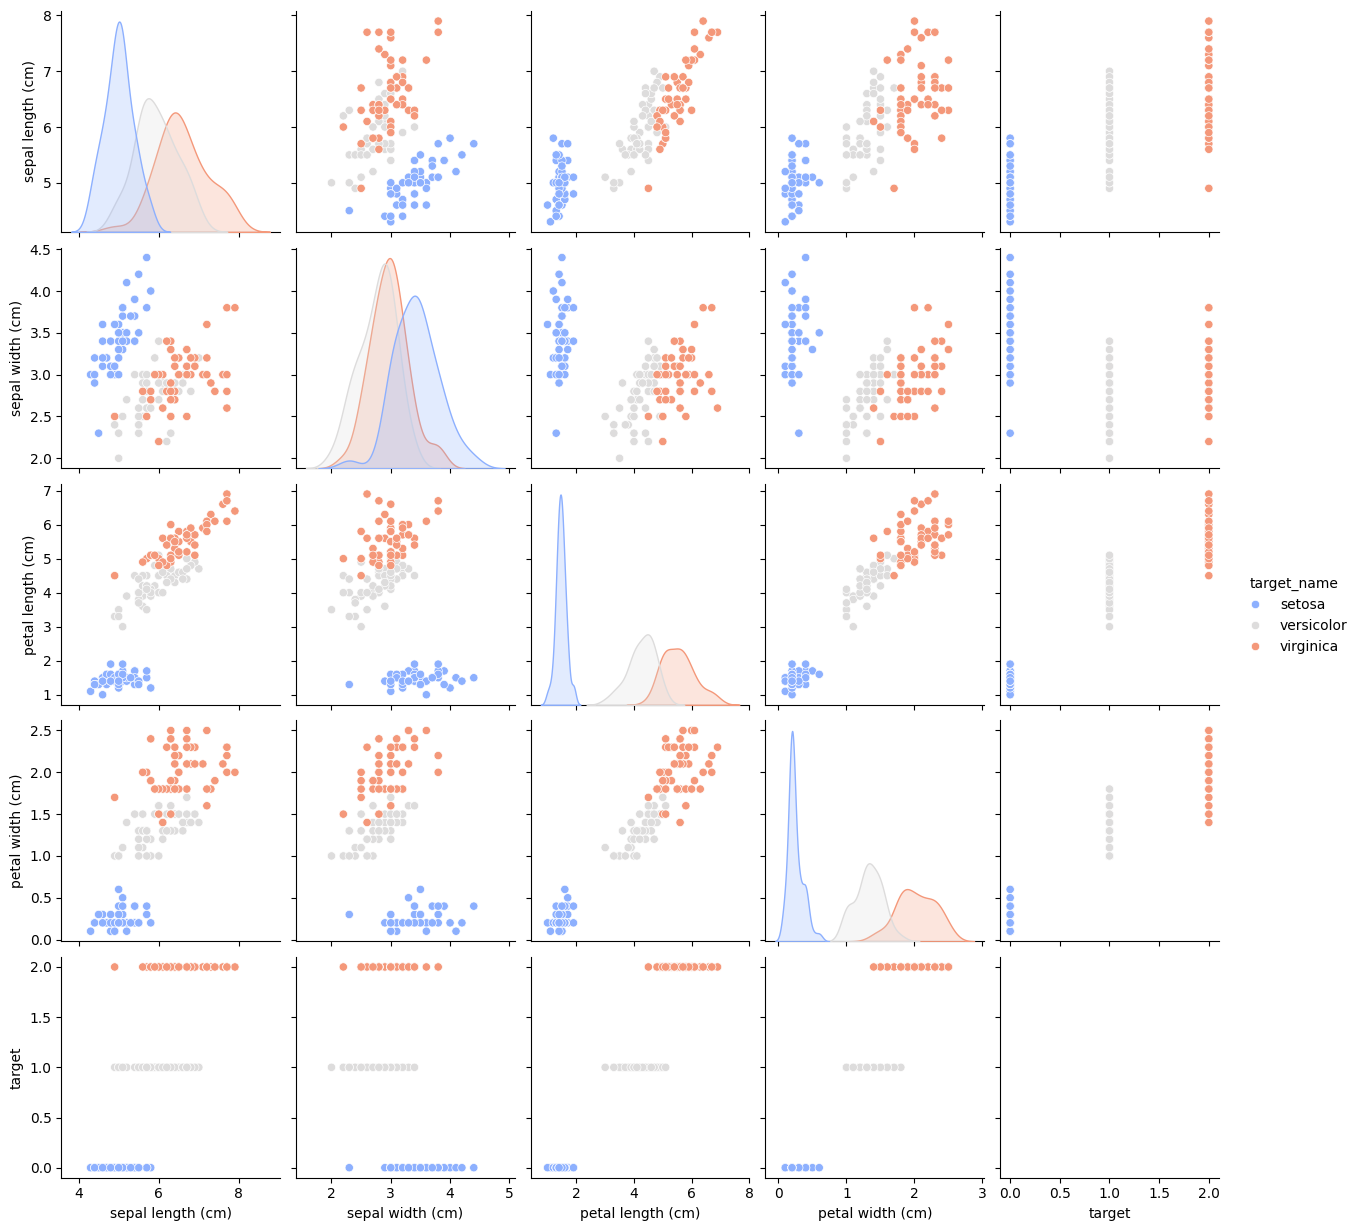

In [27]:
### Exportando o pairplot

sns.pairplot(iris_df, hue="target_name", diag_kind="kde", palette="coolwarm")

plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')

### Parte Extra Análise Preditiva

_Separando o conjunto de treinamento e testes_

In [28]:
### Utilizarei o método de stratify para garantir que a divisão dos dados seja feita de forma balanceada já que temos um dataset pequeno
### O parâmetro random_state é utilizado para garantir que a divisão seja sempre a mesma
### O parâmetro test_size é utilizado para definir a porcentagem de dados que será utilizada para teste
### Utilizarei a coluna target para garantir a divisão de espécies de flores de forma balanceada
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(iris_df, iris_df["target"]):
    train_set = iris_df.loc[train_index]
    test_set = iris_df.loc[test_index]

In [29]:
## Verificando se a divisão foi feita de forma balanceada
train_set["target_name"].value_counts() / len(train_set)

target_name
setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: count, dtype: float64

In [30]:
## vou remover a coluna do nome das espécies para que o modelo não tenha acesso a essa informação e separar os dados de treino e teste em X e y
X_train = train_set.drop(columns=["target", "target_name"])
y_train = train_set["target"]

#### Como não existem linhas nulas e nem colunas com valores categóricos não foi necessário o tratamento

In [32]:
### Vou criar um pipeline só para a padronização do processo para se no futuro tivesse mais dados ou mais metódos de pré-processamento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Não vou criar pipeline categórico porque no momento não se fez necessário

## O StarndardScaler é um método que padroniza os dados, ou seja, ele subtrai a média e divide pelo desvio padrão o que geralmente melhora o desempenho dos modelos

# Pipeline Númerico
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [34]:
from sklearn.compose import ColumnTransformer

## Vou criar um ColumnTransformer para aplicar o pipeline numérico e deixar preparado para se no futuro tiver um categórico
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, X_train.columns)
])

## Aplicando o ColumnTransformer
X_train_prepared = full_pipeline.fit_transform(X_train)

## Vou selecionar dois modelos para comparação, um de Florestas de Decisão e outro de Classificação Baseado em regressão linear

In [53]:
### Treinando o modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lin_log = LogisticRegression(random_state=42)
lin_log.fit(X_train_prepared, y_train)

LogisticRegression(random_state=42)

In [54]:
### Treinando o Modelo Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators=10, random_state=42)
forest_class.fit(X_train_prepared, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

### Em um dataset pequeno e balanceado a acurácia pode ser bem utilizada

In [58]:
### Scores do modelo Logistic Regression
scores = cross_val_score(lin_log, X_train_prepared, y_train, scoring="accuracy", cv=5)

### Criando uma função de padronização de resultados
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Scores do modelo Logistic Regression")
display_scores(scores)

Scores do modelo Logistic Regression
Scores: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
Mean: 0.9583333333333334
Standard deviation: 0.026352313834736508


In [59]:
### Scores do modelo Forest Classifier
scores = cross_val_score(forest_class, X_train_prepared, y_train, scoring="accuracy", cv=5)

### Criando uma função de padronização de resultados
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Scores do modelo Forest Classifier")
display_scores(scores)

Scores do modelo Forest Classifier
Scores: [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
Mean: 0.9583333333333334
Standard deviation: 0.0


In [60]:
### Gerando a Confusion Matrix para observar a precisão e recall
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## O cross_val_predict faz a validação cruzada e retorna as previsões feitas para cada parte do dataset
y_train_pred = cross_val_predict(lin_log, X_train_prepared, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

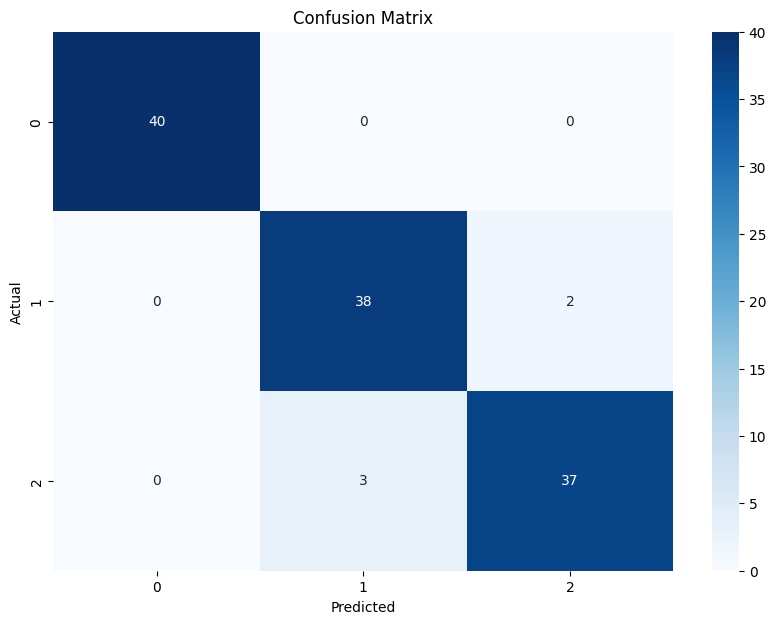

In [61]:
### Criando um heatmap com o seaborn para facilitar o entendimento da Matriz de confusão

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Esse gráfico reflete que a espécie setosa é de fato mais afastada, logo mais fácil de classificar que as outras duas

In [63]:
from sklearn.metrics import precision_score, recall_score
## Precisão avalia a proporção de quantas amostras de uma certas espécie que o modelo previu eram de fato daquela espécie(e.g. Se o modelo previu 39 "2-Virginica" e 37 realmente eram virginica, a precisão é de 37/39)
precision_score(y_train, y_train_pred, average='weighted')

0.9585157390035438

In [62]:
## Recall avalia a proporção de quantas amostras de uma certas espécie o modelo previu corretamente de todas as amostras daquela espécie(e.g. Se o modelo previu 37 "2-Virginica" e 50 realmente eram virginica, o recall é de 37/40)
recall_score(y_train, y_train_pred, average='weighted')

0.9583333333333334

In [50]:
## o F1-score combina as duas métricas anteriores em uma única métrica, é a média harmônica entre precisão e recall, é uma boa métrica para avaliar modelos balanceados já que o F1 só vai ser alto se ambos forem altos
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average='weighted')

0.9583268218992551

### Reduzindo a Dimensionalidade com o PCA, para testar o randomForest

In [73]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_prepared)
X_test_pca = pca.transform(full_pipeline.transform(test_set.drop(columns=["target", "target_name"])))

forest_class_pca = RandomForestClassifier(n_estimators=10, random_state=42)
forest_class_pca.fit(X_train_pca, y_train)

scores = cross_val_score(forest_class_pca, X_train_pca, y_train, scoring="accuracy", cv=5)
print("Scores do modelo Forest Classifier com PCA")
display_scores(scores)


Scores do modelo Forest Classifier com PCA
Scores: [0.83333333 0.91666667 0.875      0.91666667 0.91666667]
Mean: 0.8916666666666666
Standard deviation: 0.033333333333333305


### Como podemos ver na realidade a accuracy caiu, vamos testar com valores de dimensões diferentes para entender o comportamento

In [76]:
# Experimentar diferentes números de componentes principais
for n_components in range(1, 5):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_prepared)
    X_test_pca = pca.transform(full_pipeline.transform(test_set.drop(columns=["target", "target_name"])))
    
    # Treinar o modelo com os dados reduzidos
    forest_class = RandomForestClassifier()
    forest_class.fit(X_train_pca, y_train)
    
    # Avaliar a acurácia usando validação cruzada
    scores = cross_val_score(forest_class, X_train_pca, y_train, cv=5)
    print(f'Número de componentes: {n_components}, Acurácia média: {scores.mean()}')

Número de componentes: 1, Acurácia média: 0.9
Número de componentes: 2, Acurácia média: 0.9083333333333334
Número de componentes: 3, Acurácia média: 0.9333333333333333
Número de componentes: 4, Acurácia média: 0.9333333333333332


#### O que provavelmente ocorreu é que devido a pouca quantidade de colunas e linhas no dataset original, reduzir a dimensionalidade se desfaz de alguns dados em um momento que cada um importa